Let's look at how we can use various anomaly detection methods to label anomalies in the Iris data set. The Iris data set has class labels, but we aren't going to use those. 

In [79]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 1000, centers=3, cluster_std=1, random_state=6)

In [80]:
X

array([[ 9.06884898, -1.45922636],
       [-8.93801138,  1.62898166],
       [-8.24977749,  3.08834103],
       ...,
       [-8.83820162,  2.80370711],
       [ 7.67647531, -2.97933366],
       [-6.41447081,  3.23540733]])

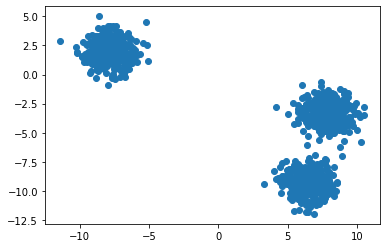

In [81]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1])

In [82]:
X.shape

(1000, 2)

We need to determine the number of neighbors to use for each point with the n_neighbors parameter. fit_predict will return labels for each data instance, indicating whether or not a point is an anomaly. Labels of 1 indicate normal instances (also sometimes called "inliers"), and -1's indicate anomalies (also sometimes called "outliers")

In [93]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = 10)
lof_predictions = lof.fit_predict(X)
print(lof_predictions)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

The output above tells us that the first row (first data instance) in X is not an anomaly, neither is the second, etc... We see a -1 in the 21st  position, which tells us the 21st row in X (with index 20) is predicted to be an outlier by LOF.

In [94]:
print(sum(lof_predictions==-1))

32


In [95]:
from sklearn.ensemble import IsolationForest
iforest_predictions = IsolationForest(random_state=0).fit_predict(X)
print(iforest_predictions)

[-1  1  1  1 -1  1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1  1  1 -1 -1  1
  1 -1  1  1 -1  1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1  1 -1  1 -1  1  1
 -1  1  1 -1  1 -1 -1  1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1  1 -1  1  1
  1 -1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1  1 -1  1  1  1  1 -1
  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1
  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1 -1 -1  1 -1 -1 -1  1 -1  1  1
  1  1  1  1 -1  1  1  1 -1  1  1 -1  1 -1  1  1 -1  1 -1  1 -1 -1  1  1
  1 -1 -1  1  1  1  1 -1  1  1  1 -1  1 -1  1  1  1  1 -1 -1 -1  1 -1  1
  1 -1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1 -1 -1
 -1 -1  1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1  1  1

In [96]:
print(sum(iforest_predictions==-1))

280


In [97]:
from sklearn.svm import OneClassSVM
ocsvm_predictions = OneClassSVM(gamma='auto').fit_predict(X)
print(ocsvm_predictions)

[-1  1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1 -1  1
  1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1  1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1
  1  1 -1 -1 -1  1 -1  1  1 -1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1
 -1  1 -1 -1 -1  1 -1 -1  1  1  1 -1  1  1  1  1 -1  1 -1  1  1  1  1  1
 -1  1  1  1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1 -1  1  1 -1  1
  1  1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1
  1  1 -1  1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1
  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1
  1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1
  1 -1 -1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1  1 -1

In [98]:
print(sum(ocsvm_predictions==-1))

502


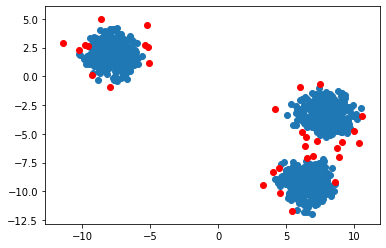

In [99]:
plt.scatter(X[lof_predictions==1,0],X[lof_predictions==1,1])
plt.scatter(X[lof_predictions==-1,0],X[lof_predictions==-1,1],c='r')

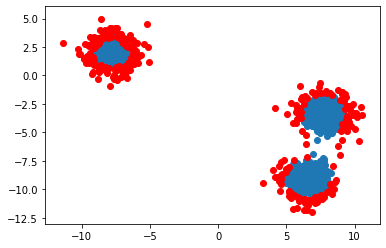

In [100]:
plt.scatter(X[iforest_predictions==1,0],X[iforest_predictions==1,1])
plt.scatter(X[iforest_predictions==-1,0],X[iforest_predictions==-1,1],c='r')

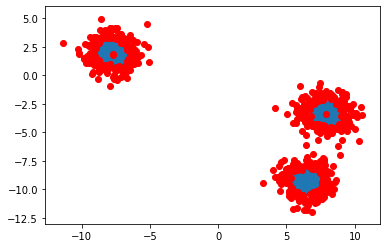

In [101]:
plt.scatter(X[ocsvm_predictions==1,0],X[ocsvm_predictions==1,1])
plt.scatter(X[ocsvm_predictions==-1,0],X[ocsvm_predictions==-1,1],c='r')

In [107]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [108]:
X = iris_data['data']

In [111]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed_X = pca.fit_transform(X)
lof = LocalOutlierFactor(n_neighbors = 10)
lof_predictions = lof.fit_predict(X)

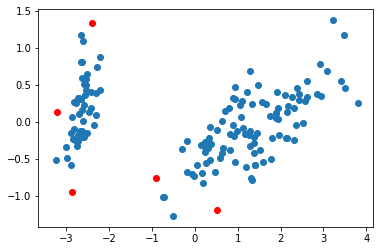

In [112]:
import matplotlib.pyplot as plt
plt.scatter(pca_transformed_X[lof_predictions==1,0],pca_transformed_X[lof_predictions==1,1])
plt.scatter(pca_transformed_X[lof_predictions==-1,0],pca_transformed_X[lof_predictions==-1,1],c='r')

In [114]:
lof = LocalOutlierFactor(n_neighbors = 5)
pca2_lof_predictions = lof.fit_predict(pca_transformed_X)

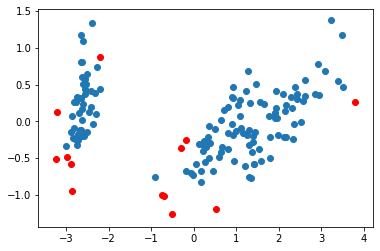

In [115]:
plt.scatter(pca_transformed_X[pca2_lof_predictions==1,0],pca_transformed_X[pca2_lof_predictions==1,1])
plt.scatter(pca_transformed_X[pca2_lof_predictions==-1,0],pca_transformed_X[pca2_lof_predictions==-1,1],c='r')

In [116]:
iforest_predictions = IsolationForest(random_state=0).fit_predict(X)

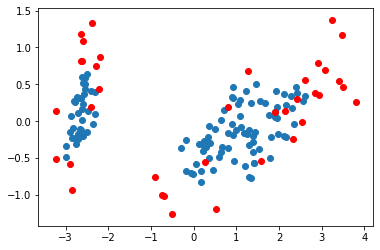

In [117]:
plt.scatter(pca_transformed_X[iforest_predictions==1,0],pca_transformed_X[iforest_predictions==1,1])
plt.scatter(pca_transformed_X[iforest_predictions==-1,0],pca_transformed_X[iforest_predictions==-1,1],c='r')

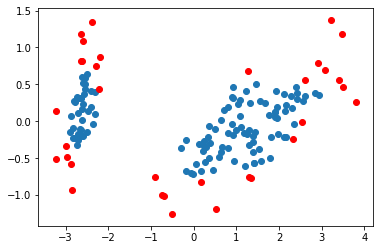

In [118]:
pca2_iforest_predictions = IsolationForest(random_state=0).fit_predict(pca_transformed_X)
plt.scatter(pca_transformed_X[pca2_iforest_predictions==1,0],pca_transformed_X[pca2_iforest_predictions==1,1])
plt.scatter(pca_transformed_X[pca2_iforest_predictions==-1,0],pca_transformed_X[pca2_iforest_predictions==-1,1],c='r')

In [119]:
ocsvm_predictions = OneClassSVM(gamma='auto').fit_predict(X)

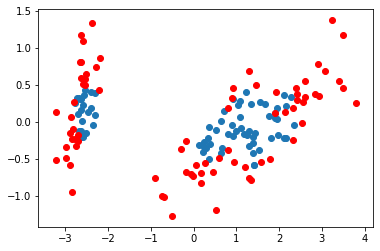

In [120]:
plt.scatter(pca_transformed_X[ocsvm_predictions==1,0],pca_transformed_X[ocsvm_predictions==1,1])
plt.scatter(pca_transformed_X[ocsvm_predictions==-1,0],pca_transformed_X[ocsvm_predictions==-1,1],c='r')

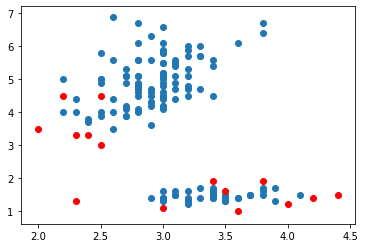

In [121]:
import matplotlib.pyplot as plt
plt.scatter(X[anomaly_predictions==1,1],X[anomaly_predictions==1,2])
plt.scatter(X[anomaly_predictions==-1,1],X[anomaly_predictions==-1,2],c='r')

We can also print out the negative of the local outlier factor score. Since the convention is label anomalies with a -1 label, sklearn will tell us the negative of the local outlier factor of each data instance instead of the positive value (remember that the higher the LOF, the more anomalous a point is considered).

In [122]:
print(lof.negative_outlier_factor_)

[-0.94522713 -0.97396211 -1.14267587 -1.05439633 -1.01156066 -1.42001743
 -1.10135083 -1.16928638 -1.58540966 -0.95221411 -1.05507042 -1.01127346
 -1.03412093 -1.73610975 -1.27068576 -1.48994478 -1.31327848 -0.97148868
 -1.76403525 -1.01907183 -1.36091452 -0.99149738 -2.79619273 -1.30026371
 -1.22394328 -1.15752278 -1.20679217 -0.9363314  -0.98305663 -0.96509773
 -1.02851935 -1.20083073 -1.34876884 -1.16509196 -0.96178956 -1.29640924
 -1.0211194  -1.1106079  -1.57091696 -0.98102171 -1.05821166 -2.09298512
 -1.42738931 -1.26117302 -1.31535133 -0.91597877 -1.01907183 -1.10471232
 -1.0211194  -1.18688797 -1.39361728 -1.04819757 -1.09885197 -1.03920319
 -1.01697652 -1.20654559 -0.95323455 -1.57303089 -0.92260666 -1.04822434
 -1.58292565 -1.22530221 -1.10096896 -1.03605579 -1.9440761  -1.04909002
 -0.99779316 -1.02451027 -1.16320096 -1.01471483 -0.989643   -1.35365975
 -0.88736199 -0.9764065  -1.08770328 -1.02362399 -1.12139269 -1.15633258
 -0.96597909 -1.58434192 -0.99442612 -1.08435642 -0

By looking at the negative local outlier factors above, as well as the labels, you might guess what threshold is used to label a point anomalous (remember that this will be a LOF value greater than 1, but it's not always clear what it should be). We can find the threshold that was used by viewing the offset attribute:

In [123]:
lof.offset_

-1.5

So we see that a local outlier score of 1.5 or greater indicates that a data point is an anomaly. This is the default. We can also set a fraction of outliers to find, and we will get a different threshold. For example, suppose we assume that 10% our our data are anomalies. We can find the 10% of the data with highest LOF values by setting the "contamination" parameter to 10%.

In [124]:
lof = LocalOutlierFactor(n_neighbors = 10, contamination=0.1)
anomaly_predictions = lof.fit_predict(X)
print(anomaly_predictions)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1  1
 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


In [125]:
print(sum(anomaly_predictions==-1))

15


Notice that even though we used the same number of nearest neighbors, the number of anomalies has changed. Let's see what the threshold LOF value is now:

In [126]:
lof.offset_

-1.2762174320959443

As expected, it is a smaller LOF value than before.

Let's look at another example applied to an outlier detection data set called the 'shuttle' data set

In [130]:
import scipy.io as sio
X = sio.loadmat('shuttle.mat')['X']
y = sio.loadmat('shuttle.mat')['y']

In [133]:
print(y)

[[1]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [131]:
X.shape

(49097, 9)

In [129]:
lof = LocalOutlierFactor(n_neighbors = 5)
lof_predictions = lof.fit_predict(X)

iforest_predictions = IsolationForest(random_state=0).fit_predict(X)

ocsvm_predictions = OneClassSVM(gamma='auto').fit_predict(X)

In [136]:
lof_predictions[lof_predictions==1] = 0
lof_predictions[lof_predictions==-1] = 1

iforest_predictions[iforest_predictions==1] = 0
iforest_predictions[iforest_predictions==-1] = 1

ocsvm_predictions[ocsvm_predictions==1] = 0
ocsvm_predictions[ocsvm_predictions==-1] = 1

In [135]:
from sklearn.metrics import accuracy_score
accuracy_score(lof_predictions, y)

0.9000549931767725

In [138]:
accuracy_score(ocsvm_predictions, y)

0.5398700531600709

In [139]:
accuracy_score(iforest_predictions, y)

0.9676151292339654

In [144]:
sum(ocsvm_predictions[ocsvm_predictions==1])

24702

In [145]:
sum(lof_predictions[lof_predictions==1])

0

In [146]:
sum(iforest_predictions[iforest_predictions==1])

5005

It's important to note that we can gett a high accuracy even if NO anomalies are detected!